# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Loading dataset

Link to dataset: https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad

In [ ]:
df = pd.read_csv("/content/advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 54.8+ KB


# Data Cleaning

In [ ]:
df.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Male,0
Country,0
Timestamp,0
Clicked on Ad,0


In [ ]:
df.drop(columns=["Ad Topic Line", "City", "Country"], inplace=True)

- No null values found
- Dropped unnecessary columns which do not affect CTR

# EDA

In [ ]:
df['Clicked on Ad'].value_counts()

,count
Clicked on Ad,
0,500
1,500


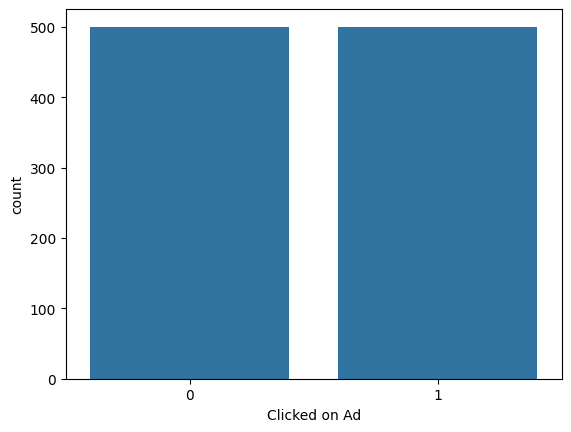

In [ ]:
sns.countplot(x="Clicked on Ad", data=df)
plt.show()

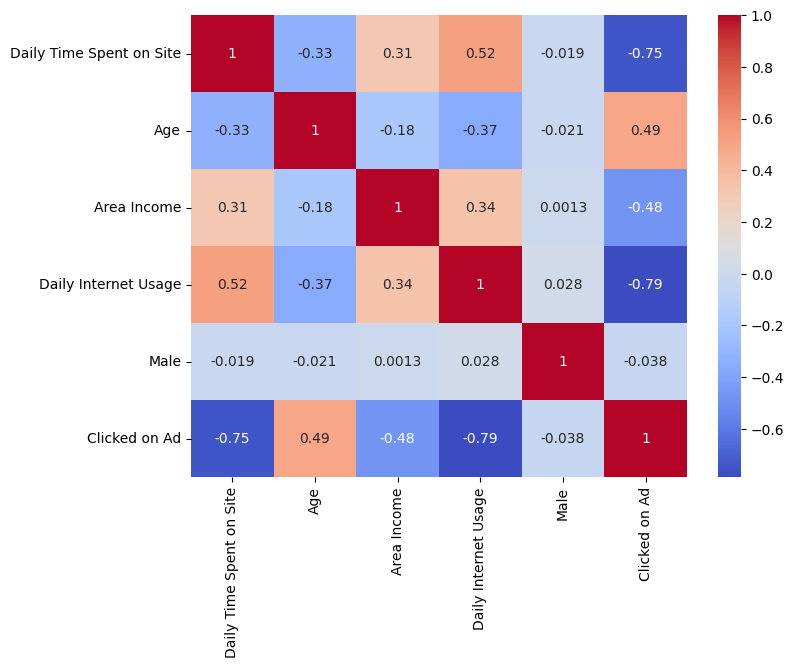

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('Timestamp', axis=1).corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
corr_target = df.corr(numeric_only=True)["Clicked on Ad"].sort_values(ascending=False)
corr_target

,Clicked on Ad
Clicked on Ad,1.000000
Age,0.492531
Male,-0.038027
Area Income,-0.476255
Daily Time Spent on Site,-0.748117
Daily Internet Usage,-0.786539


- Understanding the no. of CTR distribution we find 500 clicked and 500 didn't click
- Then, we find the correlation between Clicked on Ad and other fields

# Feature engineering

In [ ]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Hour"] = df["Timestamp"].dt.hour
df["Day"] = df["Timestamp"].dt.day
df.drop("Timestamp", axis=1, inplace=True)

- We note that the Timestamp column is in string type, so we first convert it into Datetime type
- Then, we generate more useful features from the column timestamp like hour and day because the time of the day and the day (like weekends) affect CTR

# Train-Test-Split

Set target variable and split the data into training and testing dataset

In [ ]:
X = df.drop("Clicked on Ad", axis=1)
y = df["Clicked on Ad"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Feature Scaling

In [ ]:
#scale features to mean value

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Assumptions

| Assumption                  | Reason                          |
| --------------------------- | ------------------------------- |
| Binary target               | CTR is click / no-click         |
| Linear decision boundary    | Log-odds linearity              |
| No strong multicollinearity | Stable coefficients             |
| Large sample size           | Reliable probability estimation |

(for understanding these terms kindly revise concepts of Logistic regression and ML)

# Logistic Regression Model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Model Evaluation

A classification report and confusion matrix is useful as it is a classification problem and ROC and AUC as we are using Logistic regression

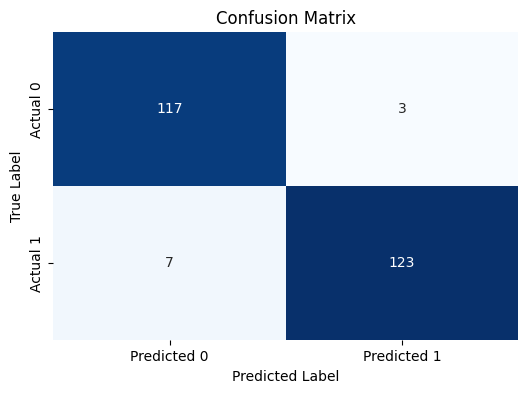

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       120
           1       0.98      0.95      0.96       130

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



To understand these terms kindly refer concepts of Evaluation metrics

In [ ]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

np.float64(0.9828205128205129)

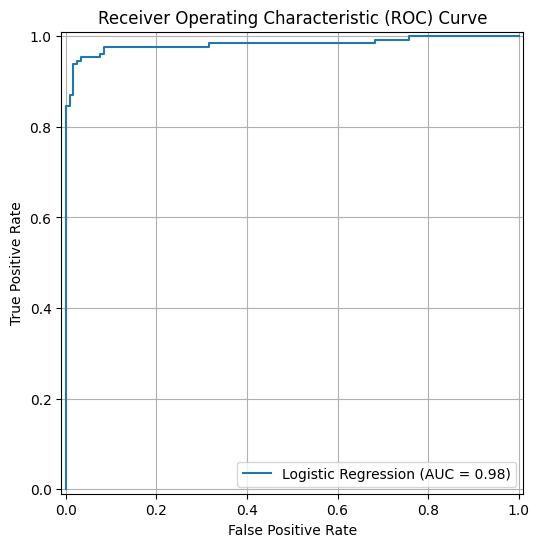

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Calculate ROC curve and AUC
# model.predict_proba(X_test)[:, 1] gives the probability of the positive class
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, name="Logistic Regression")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

# Regularization & Hyperparameter Tuning

Tune regularization strength to prevent overfitting using GridSearchCV and L1/L2 penalities

In [ ]:
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [ ]:
best_model = grid.best_estimator_

# Model Interpretability

In [ ]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": best_model.coef_[0]}).sort_values(by="Coefficient", ascending=False)
coefficients

,Feature,Coefficient
1,Age,1.244488
5,Hour,-0.118745
6,Day,-0.260582
4,Male,-0.384677
2,Area Income,-1.593130
0,Daily Time Spent on Site,-2.526132
3,Daily Internet Usage,-2.647414


Logistic Regression coefficients tell feature importance and help in business explainability that predicts which feature affects CTR result with how much probability


- Positive coefficient → higher click probability
- Negative coefficient → lower click probability